In [1]:
# Gerekli kütüphaneleri ekleme:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veri setini indirip ekleme:
data = pd.read_excel("https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1")

In [3]:
# Veri setinin ilk 5 elemanını ekranda görüntüleme:
data.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [4]:
# Hedef ve öznitelik değişkenlerini tanımlama:
X = data[["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"]]
y = data["Fiyat"]

In [5]:
# Veri setini rassal olarak eğitim ve test veri seti şeklinde ikiye bölümleme:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# LASSO regresyon modelinin seçimi ve ızgara araması için parametrelerin tanımlanması:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=42) 
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 50]} # Regularization strength will chosen using Grid Search.

from sklearn.model_selection import GridSearchCV
lasso_model_GS = GridSearchCV(estimator=lasso_model, param_grid=parameters, scoring="r2", cv=5)

# LASSO regresyon modelinin eğitimi:
lasso_model_GS.fit(X_train.values, y_train)

# LASSO modeli için optimum R2 ölçütünün değerini ekranda görüntüleme:
print("Optimum R2 value for the best LASSO regression model over train set:", lasso_model_GS.best_score_)

# LASSO modeli için optimum alpha (L1 parametresi) değerini ekranda görüntüleme:
print("Optimum alpha value for LASSO regression model:", lasso_model_GS.best_params_)

# LASSO modeli için optimum modelin parametre değerlerini ekranda görüntüleme:
print("Optimum model configuration for LASSO regression model:", lasso_model_GS.best_estimator_)

Optimum R2 value for the best LASSO regression model over train set: 0.7070875030803956
Optimum alpha value for LASSO regression model: {'alpha': 1}
Optimum model configuration for LASSO regression model: Lasso(alpha=1, random_state=42)


In [7]:
# Izgara araması sonucu seçilen en iyi tahmincinin, yani en yüksek puanı veren tahminci için çapraz doğrulama yapma:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=lasso_model_GS.best_estimator_, X=X_train.values, y=y_train, cv=5)

# Çapraz doğrulamanın her bir çalışması için tahmin edicinin puanlarını/skorlarını ekranda görüntüleme:
print(all_accuracies)

# Çapraz doğrulamanın her bir çalışması sonucu elde edilen tahmin edicinin puanlarının/skorlarının ortalamasını ve standart sapmasını ekranda görüntüleme:
print(all_accuracies.mean())
print(all_accuracies.std())

[0.59123045 0.86153674 0.75880023 0.58955277 0.73431731]
0.7070875030803956
0.10441025340335014


In [8]:
# Elde edilen en iyi modelin kesim parametresini elde etme:
lasso_model_GS.best_estimator_.intercept_

290.7383188226408

In [9]:
# Elde edilen en iyi modelin eğim parametrelerini elde etme:
coefficient_df = pd.DataFrame(lasso_model_GS.best_estimator_.coef_, X.columns, columns=["LASSO (alpha=1) Feature Coefficients"])
coefficient_df

,LASSO (alpha=1) Feature Coefficients
Oda_Sayısı,103.407284
Net_m2,1.619248
Katı,7.086422
Yaşı,-4.055176


In [10]:
# En iyi LASSO regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over train set:", lasso_model_GS.best_estimator_.score(X_train.values, y_train))

# En iyi LASSO regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over test set:", lasso_model_GS.best_estimator_.score(X_test.values, y_test))

R2 for LASSO regression model over train set: 0.7324650909211012
R2 for LASSO regression model over test set: 0.6862906745619393


In [11]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen en iyi modeli kullanarak fiyat tahmini yapma:
y_train_predicted = lasso_model_GS.best_estimator_.predict(X_train.values)
y_train_predicted = pd.Series(y_train_predicted, index=y_train.index)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺561.17, Actual price: ₺525.00
Predicted price: ₺684.83, Actual price: ₺650.00
Predicted price: ₺536.87, Actual price: ₺550.00
Predicted price: ₺688.90, Actual price: ₺675.00
Predicted price: ₺678.70, Actual price: ₺675.00
Predicted price: ₺698.95, Actual price: ₺625.00
Predicted price: ₺557.16, Actual price: ₺575.00
Predicted price: ₺673.70, Actual price: ₺650.00
Predicted price: ₺553.08, Actual price: ₺600.00
Predicted price: ₺678.74, Actual price: ₺775.00
Predicted price: ₺842.84, Actual price: ₺800.00
Predicted price: ₺553.08, Actual price: ₺500.00
Predicted price: ₺743.54, Actual price: ₺725.00
Predicted price: ₺562.16, Actual price: ₺550.00
Predicted price: ₺558.15, Actual price: ₺625.00
Predicted price: ₺689.91, Actual price: ₺650.00
Predicted price: ₺544.95, Actual price: ₺500.00
Predicted price: ₺685.85, Actual price: ₺675.00
Predicted price: ₺665.59, Actual price: ₺625.00
Predicted price: ₺550.00, Actual price: ₺500.00
Predicted price: ₺569.30, Actual price: 

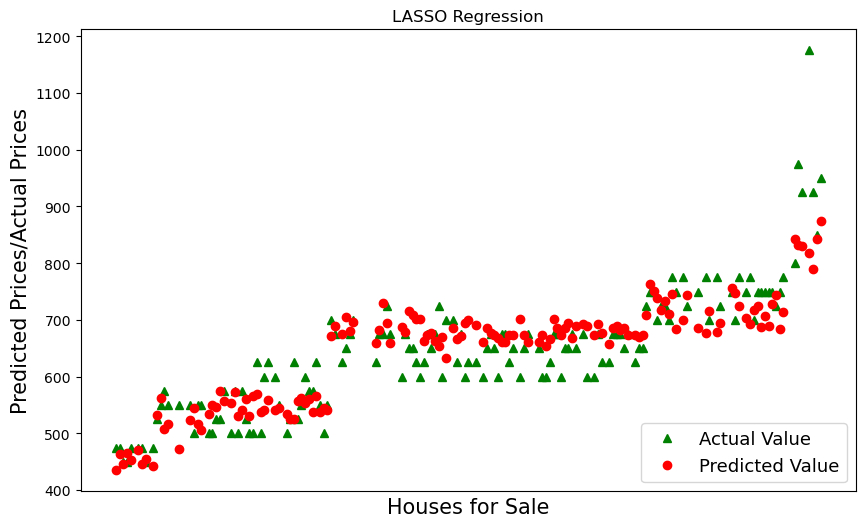

In [12]:
# Eğitim setindeki evlerin gerçek değerleri ve model ile tahmin edilmiş fiyatlarının karşılaştırılması:
plt.figure(figsize=(10, 6))
plt.xticks(y_train, y_train.index.values)
plt.plot(y_train, "g^")
plt.xticks(y_train_predicted, y_train_predicted.index.values)
plt.plot(y_train_predicted, "ro")
plt.title("LASSO Regression")
plt.xlabel("Houses for Sale", fontsize=15)
plt.ylabel("Predicted Prices/Actual Prices", fontsize=15)
plt.legend(["Actual Value", "Predicted Value"], fontsize=13, loc="lower right")
plt.show()

In [13]:
# 3 odalı, 8 yıllık bir binanın 4.katında bulunan net 105 m^2 kullanım alanına sahip bir dairenin fiyatını tahmin etme:
room_number = 3
net_m2 = 105
floor = 4
age = 8
test_apartment = np.array([[room_number, net_m2, floor, age]])
predicted_price = lasso_model_GS.best_estimator_.predict(test_apartment)[0]
print("The predicted price of the desired apartment: ₺%.2f" % predicted_price)

The predicted price of the desired apartment: ₺766.89


In [14]:
# RIDGE regresyon modelinin seçimi ve ızgara araması için parametrelerin tanımlanması:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=42) 
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 50]} # Regularization strength will chosen using Grid Search.

from sklearn.model_selection import GridSearchCV
ridge_model_GS = GridSearchCV(estimator=ridge_model, param_grid=parameters, scoring="r2", cv=5)

# RIDGE regresyon modelinin eğitimi:
ridge_model_GS.fit(X_train.values, y_train)

# RIDGE modeli için optimum R2 ölçütünün değerini ekranda görüntüleme:
print("Optimum R2 value for the best RIDGE regression model over train set:", ridge_model_GS.best_score_)

# RIDGE modeli için optimum alpha (L2 parametresi) değerini ekranda görüntüleme:
print("Optimum alpha value for RIDGE regression model:", ridge_model_GS.best_params_)

# RIDGE modeli için optimum modelin parametre değerlerini ekranda görüntüleme:
print("Optimum model configuration for RIDGE regression model:", ridge_model_GS.best_estimator_)

Optimum R2 value for the best RIDGE regression model over train set: 0.7071772649347371
Optimum alpha value for RIDGE regression model: {'alpha': 1}
Optimum model configuration for RIDGE regression model: Ridge(alpha=1, random_state=42)


In [15]:
# Izgara araması sonucu seçilen en iyi tahmincinin, yani en yüksek puanı veren tahminci için çapraz doğrulama yapma:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=ridge_model_GS.best_estimator_, X=X_train.values, y=y_train, cv=5)

# Çapraz doğrulamanın her bir çalışması için tahmin edicinin puanlarını/skorlarını ekranda görüntüleme:
print(all_accuracies)

# Çapraz doğrulamanın her bir çalışması sonucu elde edilen tahmin edicinin puanlarının/skorlarının ortalamasını ve standart sapmasını ekranda görüntüleme:
print(all_accuracies.mean())
print(all_accuracies.std())

[0.59028756 0.86202159 0.75828323 0.58997173 0.73532222]
0.7071772649347371
0.10467192818729884


In [16]:
# Elde edilen en iyi modelin kesim parametresini elde etme:
ridge_model_GS.best_estimator_.intercept_

294.7107301058713

In [17]:
# Elde edilen en iyi modelin eğim parametrelerini elde etme:
coefficient_df = pd.DataFrame(ridge_model_GS.best_estimator_.coef_, X.columns, columns=["RIDGE (alpha=1) Feature Coefficients"])
coefficient_df

,RIDGE (alpha=1) Feature Coefficients
Oda_Sayısı,107.776167
Net_m2,1.478146
Katı,7.135185
Yaşı,-4.234666


In [18]:
# En iyi RIDGE regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over train set:", ridge_model_GS.best_estimator_.score(X_train.values, y_train))

# En iyi RIDGE regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over test set:", ridge_model_GS.best_estimator_.score(X_test.values, y_test))

R2 for RIDGE regression model over train set: 0.7331046122177594
R2 for RIDGE regression model over test set: 0.6904116932614515


In [19]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen en iyi modeli kullanarak fiyat tahmini yapma:
y_train_predicted = ridge_model_GS.best_estimator_.predict(X_train.values)
y_train_predicted = pd.Series(y_train_predicted, index=y_train.index)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺558.35, Actual price: ₺525.00
Predicted price: ₺685.14, Actual price: ₺650.00
Predicted price: ₺535.10, Actual price: ₺550.00
Predicted price: ₺690.45, Actual price: ₺675.00
Predicted price: ₺677.89, Actual price: ₺675.00
Predicted price: ₺699.04, Actual price: ₺625.00
Predicted price: ₺557.35, Actual price: ₺575.00
Predicted price: ₺674.85, Actual price: ₺650.00
Predicted price: ₺550.96, Actual price: ₺600.00
Predicted price: ₺679.32, Actual price: ₺775.00
Predicted price: ₺843.77, Actual price: ₺800.00
Predicted price: ₺550.96, Actual price: ₺500.00
Predicted price: ₺744.87, Actual price: ₺725.00
Predicted price: ₺562.53, Actual price: ₺550.00
Predicted price: ₺556.53, Actual price: ₺625.00
Predicted price: ₺690.71, Actual price: ₺650.00
Predicted price: ₺541.41, Actual price: ₺500.00
Predicted price: ₺686.47, Actual price: ₺675.00
Predicted price: ₺666.38, Actual price: ₺625.00
Predicted price: ₺549.82, Actual price: ₺500.00
Predicted price: ₺567.90, Actual price: 

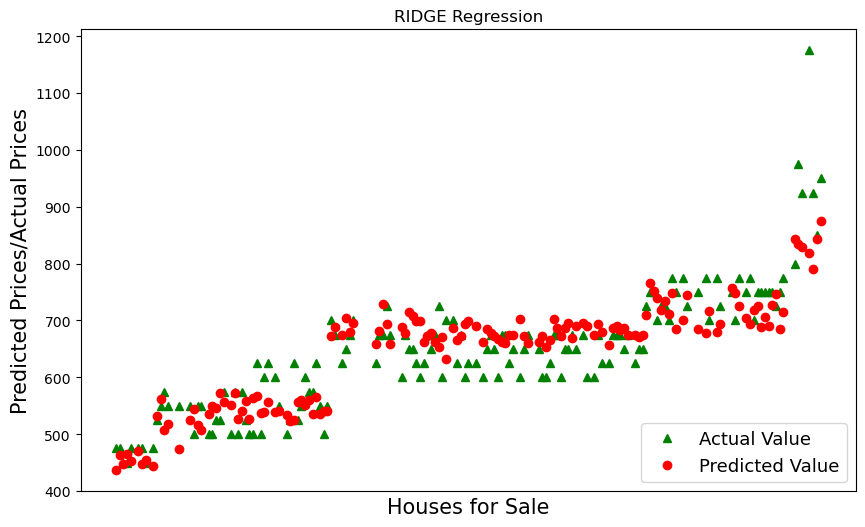

In [20]:
# Eğitim setindeki evlerin gerçek değerleri ve model ile tahmin edilmiş fiyatlarının karşılaştırılması:
plt.figure(figsize=(10, 6))
plt.xticks(y_train, y_train.index.values)
plt.plot(y_train, "g^")
plt.xticks(y_train_predicted, y_train_predicted.index.values)
plt.plot(y_train_predicted, "ro")
plt.title("RIDGE Regression")
plt.xlabel("Houses for Sale", fontsize=15)
plt.ylabel("Predicted Prices/Actual Prices", fontsize=15)
plt.legend(["Actual Value", "Predicted Value"], fontsize=13, loc="lower right")
plt.show()

In [21]:
# 3 odalı, 8 yıllık bir binanın 4.katında bulunan net 105 m^2 kullanım alanına sahip bir dairenin fiyatını tahmin etme:
room_number = 3
net_m2 = 105
floor = 4
age = 8
test_apartment = np.array([[room_number, net_m2, floor, age]])
predicted_price = ridge_model_GS.best_estimator_.predict(test_apartment)[0]
print("The predicted price of the desired apartment: ₺%.2f" % predicted_price)

The predicted price of the desired apartment: ₺767.91


In [22]:
# ElasticNet regresyon modelinin seçimi ve ızgara araması için parametrelerin tanımlanması:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(random_state=42) 
parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 50],
             "l1_ratio": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

from sklearn.model_selection import GridSearchCV
elasticnet_model_GS = GridSearchCV(estimator=elasticnet_model, param_grid=parameters, scoring="r2", cv=5)

# ElasticNet regresyon modelinin eğitimi:
elasticnet_model_GS.fit(X_train.values, y_train)

# ElasticNet modeli için optimum R2 ölçütünün değerini ekranda görüntüleme:
print("Optimum R2 value for the best ElasticNet regression model over train set:", elasticnet_model_GS.best_score_)

# ElasticNet modeli için optimum alpha ve l1_ratio (L parametresi ve eta parametresi) değerlerini ekranda görüntüleme:
print("Optimum alpha and l1_ratio values for ElasticNet regression model:", elasticnet_model_GS.best_params_)

# ElasticNet modeli için optimum modelin parametre değerlerini ekranda görüntüleme:
print("Optimum model configuration for ElasticNet regression model:", elasticnet_model_GS.best_estimator_)

Optimum R2 value for the best ElasticNet regression model over train set: 0.7073610834707613
Optimum alpha and l1_ratio values for ElasticNet regression model: {'alpha': 0.01, 'l1_ratio': 0.5}
Optimum model configuration for ElasticNet regression model: ElasticNet(alpha=0.01, random_state=42)


In [23]:
# Izgara araması sonucu seçilen en iyi tahmincinin, yani en yüksek puanı veren tahminci için çapraz doğrulama yapma:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=elasticnet_model_GS.best_estimator_, X=X_train.values, y=y_train, cv=5)

# Çapraz doğrulamanın her bir çalışması için tahmin edicinin puanlarını/skorlarını ekranda görüntüleme:
print(all_accuracies)

# Çapraz doğrulamanın her bir çalışması sonucu elde edilen tahmin edicinin puanlarının/skorlarının ortalamasını ve standart sapmasını ekranda görüntüleme:
print(all_accuracies.mean())
print(all_accuracies.std())

[0.58966797 0.86205089 0.75871268 0.59061914 0.73575473]
0.7073610834707613
0.10474012760014134


In [24]:
# Elde edilen en iyi modelin kesim parametresini elde etme:
elasticnet_model_GS.best_estimator_.intercept_

296.9768160015012

In [25]:
# Elde edilen en iyi modelin eğim parametrelerini elde etme:
coefficient_df = pd.DataFrame(elasticnet_model_GS.best_estimator_.coef_, X.columns, columns=["ElasticNet (alpha=0.01, eta=0.5) Feature Coefficients"])
coefficient_df

,"ElasticNet (alpha=0.01, eta=0.5) Feature Coefficients"
Oda_Sayısı,110.067352
Net_m2,1.403373
Katı,7.126647
Yaşı,-4.328035


In [26]:
# En iyi ElasticNet regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over train set:", elasticnet_model_GS.best_estimator_.score(X_train.values, y_train))

# En iyi ElasticNet regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over test set:", elasticnet_model_GS.best_estimator_.score(X_test.values, y_test))

R2 for ElasticNet regression model over train set: 0.7333501064823666
R2 for ElasticNet regression model over test set: 0.6923107858960038


In [27]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen en iyi modeli kullanarak fiyat tahmini yapma:
y_train_predicted = elasticnet_model_GS.best_estimator_.predict(X_train.values)
y_train_predicted = pd.Series(y_train_predicted, index=y_train.index)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺556.96, Actual price: ₺525.00
Predicted price: ₺685.39, Actual price: ₺650.00
Predicted price: ₺534.27, Actual price: ₺550.00
Predicted price: ₺691.36, Actual price: ₺675.00
Predicted price: ₺677.41, Actual price: ₺675.00
Predicted price: ₺698.90, Actual price: ₺625.00
Predicted price: ₺557.55, Actual price: ₺575.00
Predicted price: ₺675.58, Actual price: ₺650.00
Predicted price: ₺549.95, Actual price: ₺600.00
Predicted price: ₺679.65, Actual price: ₺775.00
Predicted price: ₺844.05, Actual price: ₺800.00
Predicted price: ₺549.95, Actual price: ₺500.00
Predicted price: ₺745.31, Actual price: ₺725.00
Predicted price: ₺562.51, Actual price: ₺550.00
Predicted price: ₺555.80, Actual price: ₺625.00
Predicted price: ₺691.25, Actual price: ₺650.00
Predicted price: ₺539.65, Actual price: ₺500.00
Predicted price: ₺686.92, Actual price: ₺675.00
Predicted price: ₺666.92, Actual price: ₺625.00
Predicted price: ₺549.53, Actual price: ₺500.00
Predicted price: ₺567.26, Actual price: 

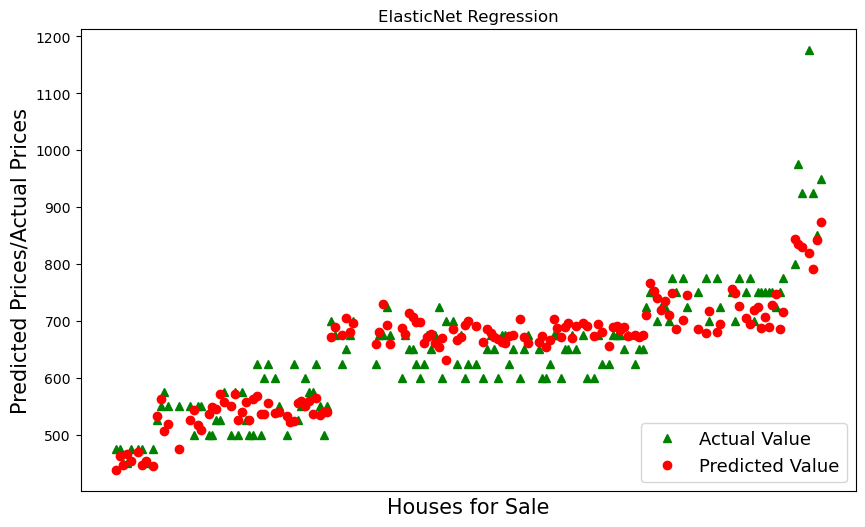

In [28]:
# Eğitim setindeki evlerin gerçek değerleri ve model ile tahmin edilmiş fiyatlarının karşılaştırılması:
plt.figure(figsize=(10, 6))
plt.xticks(y_train, y_train.index.values)
plt.plot(y_train, "g^")
plt.xticks(y_train_predicted, y_train_predicted.index.values)
plt.plot(y_train_predicted, "ro")
plt.title("ElasticNet Regression")
plt.xlabel("Houses for Sale", fontsize=15)
plt.ylabel("Predicted Prices/Actual Prices", fontsize=15)
plt.legend(["Actual Value", "Predicted Value"], fontsize=13, loc="lower right")
plt.show()

In [29]:
# 3 odalı, 8 yıllık bir binanın 4.katında bulunan net 105 m^2 kullanım alanına sahip bir dairenin fiyatını tahmin etme:
room_number = 3
net_m2 = 105
floor = 4
age = 8
test_apartment = np.array([[room_number, net_m2, floor, age]])
predicted_price = elasticnet_model_GS.best_estimator_.predict(test_apartment)[0]
print("The predicted price of the desired apartment: ₺%.2f" % predicted_price)

The predicted price of the desired apartment: ₺768.42
